## Softmax Classification for MNIST : Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data -  target class : 10

In [ ]:
# parameters
batch_size = 100
training_epochs = 20
nb_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### target - one-hot encoding

In [ ]:
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

### Step 2. Softmax Classification Model (input = 784, output = 10 with softmax function)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(img_rows ,img_cols)))
model.add(Dense(units=nb_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Step 4. Train the model

In [ ]:
history=model.fit(X_train, Y_train, batch_size=batch_size, 
                  epochs=training_epochs, verbose=2,
                  validation_split=0.2)

Epoch 1/20
480/480 - 1s - loss: 0.6974 - accuracy: 0.8264 - val_loss: 0.3825 - val_accuracy: 0.9017
Epoch 2/20
480/480 - 1s - loss: 0.3705 - accuracy: 0.9004 - val_loss: 0.3198 - val_accuracy: 0.9129
Epoch 3/20
480/480 - 1s - loss: 0.3259 - accuracy: 0.9108 - val_loss: 0.2982 - val_accuracy: 0.9168
Epoch 4/20
480/480 - 1s - loss: 0.3051 - accuracy: 0.9160 - val_loss: 0.2854 - val_accuracy: 0.9210
Epoch 5/20
480/480 - 1s - loss: 0.2928 - accuracy: 0.9188 - val_loss: 0.2793 - val_accuracy: 0.9231
Epoch 6/20
480/480 - 1s - loss: 0.2843 - accuracy: 0.9205 - val_loss: 0.2722 - val_accuracy: 0.9258
Epoch 7/20
480/480 - 1s - loss: 0.2784 - accuracy: 0.9223 - val_loss: 0.2722 - val_accuracy: 0.9252
Epoch 8/20
480/480 - 1s - loss: 0.2732 - accuracy: 0.9234 - val_loss: 0.2657 - val_accuracy: 0.9273
Epoch 9/20
480/480 - 1s - loss: 0.2692 - accuracy: 0.9248 - val_loss: 0.2658 - val_accuracy: 0.9281
Epoch 10/20
480/480 - 1s - loss: 0.2661 - accuracy: 0.9259 - val_loss: 0.2646 - val_accuracy: 0.9277

### Step 5. Test the Modle

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print('Test loss = ', score[0], 'Test accuracy = ', score[1])

Test loss =  0.26567402482032776 Test accuracy =  0.9272000193595886


### Plot the Training loss

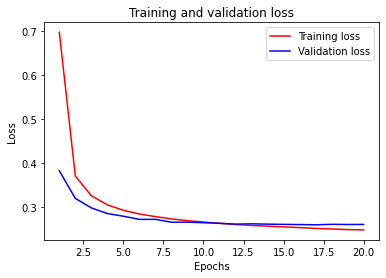

In [ ]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'r', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training Accuracy

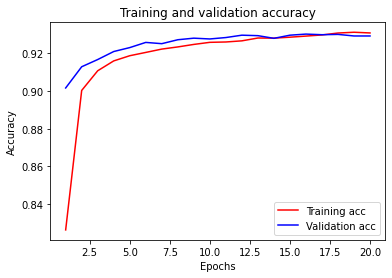

In [ ]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()